In [58]:
#This code is used to clean Kagle working directory
import os
import shutil
working_dir = '/kaggle/working'
for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.remove(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
    except Exception as e:
        print(f'Failed to delete {item_path}. Reason: {e}')
print("Cleaned")

Cleaned


In [5]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
with zipfile.ZipFile("/kaggle/input/food-101/food-101.zip", 'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/")

In [7]:
data_dir = "/kaggle/input/food-101/food-101/food-101/images"
print(os.listdir(data_dir))

['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'chu

In [8]:
img_size = (128, 128)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(101, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

I0000 00:00:1751722493.282456      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1751722503.695029     110 service.cc:148] XLA service 0x795428002f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751722503.695899     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751722504.610639     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2525 ━━━━━━━━━━━━━━━━━━━━ 8:12:33 12s/step - accuracy: 0.0312 - loss: 5.7815

I0000 00:00:1751722508.132322     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1059s 415ms/step - accuracy: 0.0914 - loss: 4.3503 - val_accuracy: 0.3386 - val_loss: 2.7984
Epoch 2/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 640s 254ms/step - accuracy: 0.3053 - loss: 2.8917 - val_accuracy: 0.4003 - val_loss: 2.4866
Epoch 3/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 644s 255ms/step - accuracy: 0.3626 - loss: 2.6101 - val_accuracy: 0.4266 - val_loss: 2.3572
Epoch 4/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 662s 262ms/step - accuracy: 0.3953 - loss: 2.4675 - val_accuracy: 0.4409 - val_loss: 2.2887
Epoch 5/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 759s 301ms/step - accuracy: 0.4119 - loss: 2.3764 - val_accuracy: 0.4461 - val_loss: 2.2471
Epoch 6/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 667s 264ms/step - accuracy: 0.4275 - loss: 2.3149 - val_accuracy: 0.4562 - val_loss: 2.2097
Epoch 7/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 734s 291ms/step - accuracy: 0.4378 - loss: 2.2707 - val_accuracy: 0.4602 - val_loss: 2.1911
Epoch 8/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 636s 252ms/step - accuracy: 0.

In [13]:
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    callbacks=callbacks
)

Epoch 1/3
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 703s 270ms/step - accuracy: 0.4441 - loss: 2.2135 - val_accuracy: 0.5013 - val_loss: 1.9985
Epoch 2/3
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 708s 281ms/step - accuracy: 0.4888 - loss: 2.0168 - val_accuracy: 0.5184 - val_loss: 1.9060
Epoch 3/3
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 680s 269ms/step - accuracy: 0.5128 - loss: 1.9040 - val_accuracy: 0.5379 - val_loss: 1.8240


In [14]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

632/632 ━━━━━━━━━━━━━━━━━━━━ 114s 180ms/step - accuracy: 0.5433 - loss: 1.8193
Validation Accuracy: 54.16%


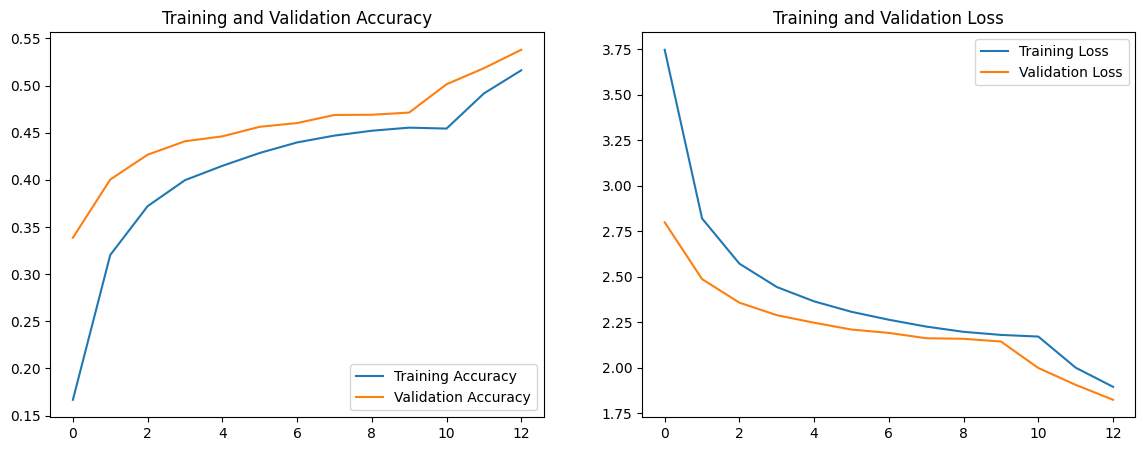

In [15]:
def plot_learning_curves(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']
    epochs_range = range(len(acc))
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
plot_learning_curves(history, fine_tune_history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


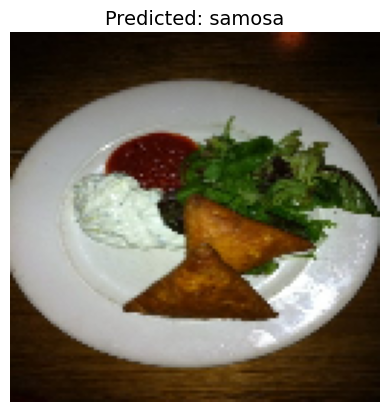

In [57]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
model = load_model("best_model.h5")
img_path = '/kaggle/input/food-101/food-101/food-101/images/samosa/303708.jpg' 
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
class_names = sorted(os.listdir('/kaggle/input/food-101/food-101/food-101/images'))  
predicted_class_name = class_names[predicted_class_index]
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name}", fontsize=14)
plt.show()